In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

**Loading the Data:** 

We're starting by loading our dataset. It's like opening a book; we need to see what's inside. Our dataset is stored in a file, and we're using code to open it and load the data into our computer so that we can work with it.

In [5]:
# Load the dataset
df = pd.read_csv(r"C:\Users\pawar\Documents\ecommerce_customer_data_large.csv")

**Taking a Sneak Peek:**

Next, we're taking a quick peek at the beginning of our data. It's similar to flipping through the first few pages of a book to see what it's about. We want to get a sense of what our data looks like by displaying the first few rows.

In [9]:
# Display the first few rows of the dataset
df.head()

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,44605,2023-05-03 21:30:02,Home,177,1,2427,PayPal,31,1.0,John Rivera,31,Female,0
1,44605,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,31,1.0,John Rivera,31,Female,0
2,44605,2020-07-13 06:16:57,Books,413,1,2345,Credit Card,31,1.0,John Rivera,31,Female,0
3,44605,2023-01-17 13:14:36,Electronics,396,3,937,Cash,31,0.0,John Rivera,31,Female,0
4,44605,2021-05-01 11:29:27,Books,259,4,2598,PayPal,31,1.0,John Rivera,31,Female,0


**Getting the Basic Story:**

After our sneak peek, we're interested in the basic story our data tells. We want to know things like averages, ranges, and common patterns. So, we're using code to summarize the numerical parts of our data.

Column Information:
The dataset contains the following columns:

    Customer ID: A unique identifier for each customer.
    Customer Name: The name of the customer (generated by Faker).
    Customer Age: The age of the customer (generated by Faker).
    Gender: The gender of the customer (generated by Faker).
    Purchase Date: The date of each purchase made by the customer.
    Product Category: The category or type of the purchased product.
    Product Price: The price of the purchased product.
    Quantity: The quantity of the product purchased.
    Total Purchase Amount: The total amount spent by the customer in each transaction.
    Payment Method: The method of payment used by the customer (e.g., credit card, PayPal).
    Returns: Whether the customer returned any products from the order (binary: 0 for no return, 1 for return).
    Churn: A binary column indicating whether the customer has churned (0 for retained, 1 for churned).*

In [10]:
# Get basic summary statistics
df.describe()

,Customer ID,Product Price,Quantity,Total Purchase Amount,Customer Age,Returns,Age,Churn
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,202618.000000,250000.000000,250000.00000
mean,25017.632092,254.742724,3.004936,2725.385196,43.798276,0.500824,43.798276,0.20052
std,14412.515718,141.738104,1.414737,1442.576095,15.364915,0.500001,15.364915,0.40039
min,1.000000,10.000000,1.000000,100.000000,18.000000,0.000000,18.000000,0.00000
25%,12590.000000,132.000000,2.000000,1476.000000,30.000000,0.000000,30.000000,0.00000
50%,25011.000000,255.000000,3.000000,2725.000000,44.000000,1.000000,44.000000,0.00000
75%,37441.250000,377.000000,4.000000,3975.000000,57.000000,1.000000,57.000000,0.00000
max,50000.000000,500.000000,5.000000,5350.000000,70.000000,1.000000,70.000000,1.00000


**Understanding the Characters:**

Our data has different types of information, like names, categories, and descriptions. We're also interested in understanding these parts. It's like finding out who the characters are in a book. So, we're summarizing the categorical parts of our data.

In [11]:
df.describe(include='O')

,Purchase Date,Product Category,Payment Method,Customer Name,Gender
count,250000,250000,250000,250000,250000
unique,249728,4,3,39878,2
top,2020-10-16 09:27:42,Electronics,Credit Card,Michael Johnson,Male
freq,2,62630,83547,119,125676


**Checking for Missing Pieces:**

We need to make sure our data is complete. Just like a book shouldn't have missing pages, our dataset shouldn't have missing information. We're using code to check if anything is missing.

In [12]:
# Get information about data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer ID            250000 non-null  int64  
 1   Purchase Date          250000 non-null  object 
 2   Product Category       250000 non-null  object 
 3   Product Price          250000 non-null  int64  
 4   Quantity               250000 non-null  int64  
 5   Total Purchase Amount  250000 non-null  int64  
 6   Payment Method         250000 non-null  object 
 7   Customer Age           250000 non-null  int64  
 8   Returns                202618 non-null  float64
 9   Customer Name          250000 non-null  object 
 10  Age                    250000 non-null  int64  
 11  Gender                 250000 non-null  object 
 12  Churn                  250000 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 24.8+ MB


In a nutshell, these steps are like opening a new book for the first time. We're taking a quick look at the beginning, understanding the key characters (data types), checking for missing pages (missing data), and preparing ourselves to dive deeper into the story (your project) with a clear understanding of what we're working with.

**Removing Duplicate Data:**

Imagine you're reading a book, and some pages are repeated. It's confusing, right? In our dataset, we want each row to represent a unique transaction. So, we're using code to remove any duplicated entries to make sure each transaction is unique.

In [13]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

**Checking for Missing Information:**

We don't want missing pieces in our story. Similarly, we don't want missing data in our dataset. We're using code to check if any information is missing and count how many pieces are missing.

In [14]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:")
missing_values

Missing Values:


Customer ID                  0
Purchase Date                0
Product Category             0
Product Price                0
Quantity                     0
Total Purchase Amount        0
Payment Method               0
Customer Age                 0
Returns                  47382
Customer Name                0
Age                          0
Gender                       0
Churn                        0
dtype: int64

**Handling Missing 'Returns' Information:**

In our dataset, some customers might not have returned any items. To make things clear, we're filling in the missing 'Returns' information with a default value of 0. This way, we know that there were no returns for those transactions.

In [15]:
# Replace missing 'Returns' values with a suitable default value, e.g., 0 for no return
default_return_value = 0
df['Returns'].fillna(default_return_value, inplace=True)

df.isnull().sum()

Customer ID              0
Purchase Date            0
Product Category         0
Product Price            0
Quantity                 0
Total Purchase Amount    0
Payment Method           0
Customer Age             0
Returns                  0
Customer Name            0
Age                      0
Gender                   0
Churn                    0
dtype: int64

**Understanding Time:**

Just like a book has a publication date, our dataset has a 'Purchase Date.' We're making it more reader-friendly by converting it into a datetime format. Also, we're extracting the year and month from the 'Purchase Date' to help us see patterns over time.

In [16]:
# Convert 'Purchase Date' to datetime format
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])

# Extract year and month from 'Purchase Date'
df['Purchase Year'] = df['Purchase Date'].dt.year
df['Purchase Month'] = df['Purchase Date'].dt.month

**Calculating the Price of Each Transaction:**

We're calculating the 'Total Purchase Amount' for each transaction. It's like finding out the total cost of all the items bought in a shopping cart.

In [17]:
# Calculate 'Total Purchase Amount' per transaction
df['Total Purchase Amount'] = df['Product Price'] * df['Quantity']

**Cleaning Up:**

Sometimes, there are characters in a book who don't contribute much to the story. Similarly, in our dataset, we're removing some columns that aren't needed for our current project. This helps keep things focused.

In [18]:
# Drop unnecessary columns
df.drop(['Customer Name'], axis=1, inplace=True)
df.drop(['Age'], axis=1, inplace=True)

df.head(10)

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Gender,Churn,Purchase Year,Purchase Month
0,44605,2023-05-03 21:30:02,Home,177,1,177,PayPal,31,1.0,Female,0,2023,5
1,44605,2021-05-16 13:57:44,Electronics,174,3,522,PayPal,31,1.0,Female,0,2021,5
2,44605,2020-07-13 06:16:57,Books,413,1,413,Credit Card,31,1.0,Female,0,2020,7
3,44605,2023-01-17 13:14:36,Electronics,396,3,1188,Cash,31,0.0,Female,0,2023,1
4,44605,2021-05-01 11:29:27,Books,259,4,1036,PayPal,31,1.0,Female,0,2021,5
5,13738,2022-08-25 06:48:33,Home,191,3,573,Credit Card,27,1.0,Female,0,2022,8
6,13738,2023-07-25 05:17:24,Electronics,205,1,205,Credit Card,27,0.0,Female,0,2023,7
7,13738,2023-02-05 19:31:48,Books,370,5,1850,Cash,27,1.0,Female,0,2023,2
8,13738,2021-12-21 03:29:05,Home,12,2,24,Cash,27,0.0,Female,0,2021,12
9,13738,2023-02-09 00:53:14,Electronics,40,4,160,Cash,27,0.0,Female,0,2023,2


**Saving Our Progress:**

Just as an author saves their work, we're saving our cleaned and organized dataset to a new file. This way, we can always go back to our progress if we need to.

In [19]:
# Save the cleaned and manipulated data to a new CSV file
df.to_csv('cleaned_ecommerce_data.csv', index=False)

So, at this point, we've removed duplicates, ensured there are no missing pieces, handled missing information, made our time-related data more understandable, calculated transaction amounts, and removed unnecessary details. Our dataset is now cleaned and ready for the next chapters of our project.

**Reading the Cleaned Data:**

You're opening the book you've been working on. The dataset you cleaned and saved earlier is now being read back into your project. This is like opening a book to continue reading from where you left off.

In [23]:
df = pd.read_csv("C:/Users/pawar/Downloads/cleaned_ecommerce_data.csv")

**Dealing with Dates:**

You've taken the 'Purchase Date' column and converted it into a datetime format. This is like translating a part of the story into a language you can better understand. Now, you can easily work with dates and times.

In [24]:
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])

**Getting to Know Your Data:**

Just as you'd examine a book to understand its structure, you're using code to learn more about your dataset. The info() method provides a summary, showing you the data types and the presence of missing values. The describe() method gives you statistics like the mean, standard deviation, minimum, and maximum values for numerical columns. When you use describe(include='all'), you get information about both numerical and non-numerical (categorical) columns.

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Customer ID            250000 non-null  int64         
 1   Purchase Date          250000 non-null  datetime64[ns]
 2   Product Category       250000 non-null  object        
 3   Product Price          250000 non-null  int64         
 4   Quantity               250000 non-null  int64         
 5   Total Purchase Amount  250000 non-null  int64         
 6   Payment Method         250000 non-null  object        
 7   Customer Age           250000 non-null  int64         
 8   Returns                250000 non-null  float64       
 9   Gender                 250000 non-null  object        
 10  Churn                  250000 non-null  int64         
 11  Purchase Year          250000 non-null  int64         
 12  Purchase Month         250000 non-null  int6

In [26]:
df.describe()

,Customer ID,Purchase Date,Product Price,Quantity,Total Purchase Amount,Customer Age,Returns,Churn,Purchase Year,Purchase Month
count,250000.000000,250000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.00000,250000.000000,250000.000000
mean,25017.632092,2021-11-06 19:26:22.286192384,254.742724,3.004936,765.954660,43.798276,0.405904,0.20052,2021.377136,6.190376
min,1.000000,2020-01-01 00:07:26,10.000000,1.000000,10.000000,18.000000,0.000000,0.00000,2020.000000,1.000000
25%,12590.000000,2020-12-03 08:10:12,132.000000,2.000000,288.000000,30.000000,0.000000,0.00000,2020.000000,3.000000
50%,25011.000000,2021-11-06 07:39:08.500000,255.000000,3.000000,604.000000,44.000000,0.000000,0.00000,2021.000000,6.000000
75%,37441.250000,2022-10-11 01:21:56.249999872,377.000000,4.000000,1135.000000,57.000000,1.000000,0.00000,2022.000000,9.000000
max,50000.000000,2023-09-13 18:42:49,500.000000,5.000000,2500.000000,70.000000,1.000000,1.00000,2023.000000,12.000000
std,14412.515718,NaN,141.738104,1.414737,593.494204,15.364915,0.491067,0.40039,1.074712,3.353238


In [27]:
df.describe(include='O')

,Product Category,Payment Method,Gender
count,250000,250000,250000
unique,4,3,2
top,Electronics,Credit Card,Male
freq,62630,83547,125676


So, in this part, you've opened your cleaned dataset, made the dates more readable, and gained a deeper understanding of your data. This is similar to re-reading a book to refresh your memory about its contents before continuing with the story.

**Categorizing Customers by Age:**

You're dividing your customers into age groups, creating bins from 0 to 10, 11 to 20, and so on. This is similar to grouping characters in a book by their age or characteristics, helping you understand different aspects of the story.

In [28]:
# Define age ranges
age_ranges = [0, 10, 20, 30, 40, 50, 60, np.inf]
age_labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '60+']

# Categorize customers into age groups
df['Age Group'] = pd.cut(df['Customer Age'], bins=age_ranges, labels=age_labels)

**Visualizing Customer Age Distribution:**

To gain a better understanding of the age distribution of your customers, you're using a barplot. This is like creating a visual representation of a character profile in your story, showing how many characters fall into different age groups.

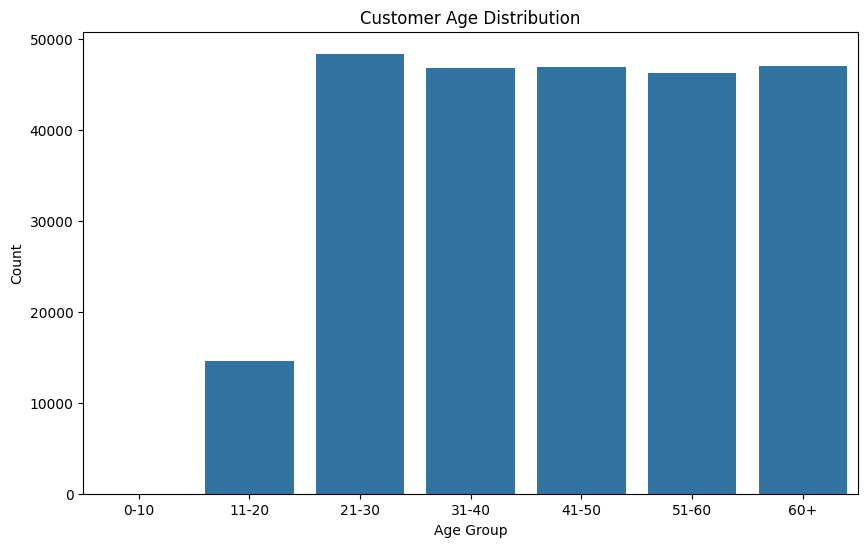

In [29]:
# Visualize customer age distribution as a barplot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Age Group', order=age_labels)
plt.title('Customer Age Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

**Analyzing Gender Distribution:**

You're determining the distribution of genders among your customers. This is akin to understanding the balance between male and female characters in your story.

In [30]:
# Calculate gender distribution
gender_distribution = df['Gender'].value_counts()

**Visualizing Gender Distribution:**

You're using a pie chart to visually represent the gender distribution. This is a way to showcase the proportions of different character types in your story.

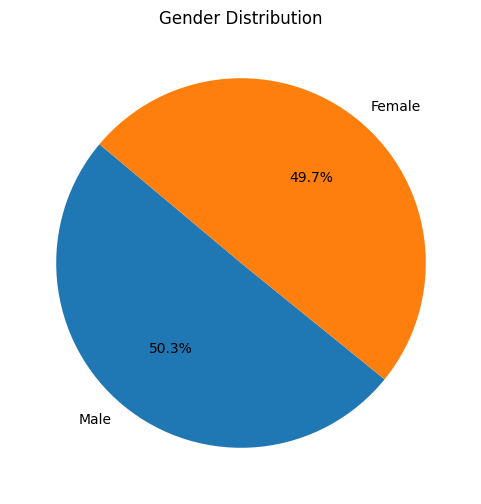

In [31]:
# Create a pie chart for gender distribution
plt.figure(figsize=(6, 6))
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution')
plt.show()

**Calculating Total Revenue:**

You're finding the sum of the 'Total Purchase Amount' column. Think of this as calculating the total earnings or expenditures in your story.

In [32]:
# Calculate total revenue
total_revenue = df['Total Purchase Amount'].sum()
print(f'Total Revenue: ${total_revenue:.2f}')

Total Revenue: $191488665.00


These steps help you get a clearer picture of the demographics of your customers and their impact on your business's financial performance, just as understanding the characters and their traits can provide deeper insights into the story's plot and dynamics.

## **Customer Segmentation:**

**Segmentation Based on Total Purchase Amount:**

You're categorizing customers into three segments: Low-Value, Mid-Value, and High-Value based on their total purchase amounts. This helps you understand which customers contribute most to your revenue.The visualisation makes it understand in better way.

In [33]:
# Segment customers by total purchase amount
# Define thresholds for segmentation
low_value_threshold = 700
high_value_threshold = 1500

# Create a function to categorize customers based on total purchase amount
def categorize_customers(total_purchase_amount):
    if total_purchase_amount <= low_value_threshold:
        return "Low-Value"
    elif total_purchase_amount <= high_value_threshold:
        return "Mid-Value"
    else:
        return "High-Value"

# Apply the categorization function to create a new column 'Customer Segment'
df['Customer Segment'] = df['Total Purchase Amount'].apply(categorize_customers)

# Print the count of customers in each segment
segment_counts = df['Customer Segment'].value_counts()
segment_counts

Customer Segment
Low-Value     137825
Mid-Value      78898
High-Value     33277
Name: count, dtype: int64

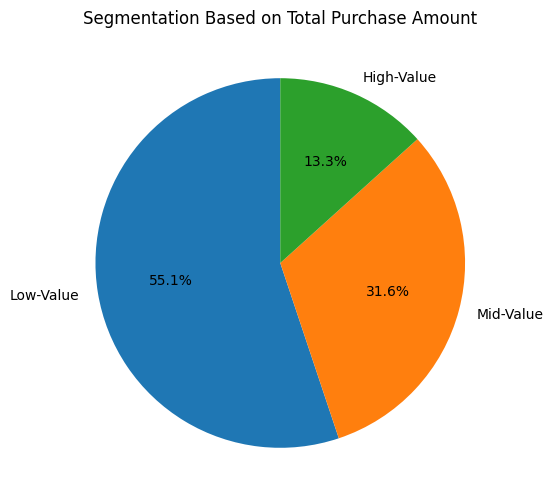

In [34]:
plt.figure(figsize=(6, 6))
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Segmentation Based on Total Purchase Amount')
plt.show()

**Recency, Frequency, and Monetary Analysis:**

You're analyzing customer behavior by considering Recency, which measures how recently customers made a purchase; Frequency, which quantifies how often they buy; and Monetary, which represents their total spending. This is like characterizing your readers by how often they engage with your story and how much they invest in it.

In [35]:
# Step 1: Calculate Recency
analysis_date = pd.to_datetime('2023-10-01')  
recency = df.groupby('Customer ID')['Purchase Date'].max()
recency = (analysis_date - recency).dt.days  # Calculate recency in days

# Step 2: Calculate Frequency
frequency = df.groupby('Customer ID').size()

# Step 3: Calculate Monetary
monetary = df.groupby('Customer ID')['Total Purchase Amount'].sum()

# Step 4: Create RFM DataFrame
rfm_df = pd.DataFrame({'Recency': recency, 'Frequency': frequency, 'Monetary': monetary})

**Segmentation Criteria:**

You've defined criteria and thresholds for each RFM component to categorize customers into segments such as High, Medium, Low, or Inactive for Recency, and Low, Medium, High, or Very High for Frequency and Monetary. This is akin to classifying characters based on their characteristics, such as age, personality, and role in the story.

In [36]:
# Step 5: Segmentation
# Define segmentation criteria (you can adjust these thresholds)
recency_bins = [0, 30, 90, 180, 1000]
frequency_bins = [1, 2, 5, 10, 50]
monetary_bins = [0, 1000, 2500, 5000, 10000]

rfm_df['Recency_Score'] = pd.cut(rfm_df['Recency'], bins=recency_bins, labels=['High', 'Medium', 'Low', 'Inactive'], right=False)
rfm_df['Frequency_Score'] = pd.cut(rfm_df['Frequency'], bins=frequency_bins, labels=['Low', 'Medium', 'High', 'Very High'], right=False)
rfm_df['Monetary_Score'] = pd.cut(rfm_df['Monetary'], bins=monetary_bins, labels=['Low', 'Medium', 'High', 'Very High'], right=False)

rfm_df

,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score
Customer ID,,,,,,
1,305,3,5600,Inactive,Medium,Very High
2,89,6,6459,Medium,High,Very High
3,239,4,3613,Inactive,Medium,High
4,458,5,4339,Inactive,High,High
5,441,5,2263,Inactive,High,Medium
...,...,...,...,...,...,...
49996,376,7,6107,Inactive,High,Very High
49997,405,2,1592,Inactive,Medium,Medium
49998,30,10,8440,Medium,Very High,Very High


**Visualization of Segmentation:**

You're visualizing the distribution of customers in each segment for Recency, Frequency, and Monetary. This visualization helps you grasp the distribution of different character types in your story.

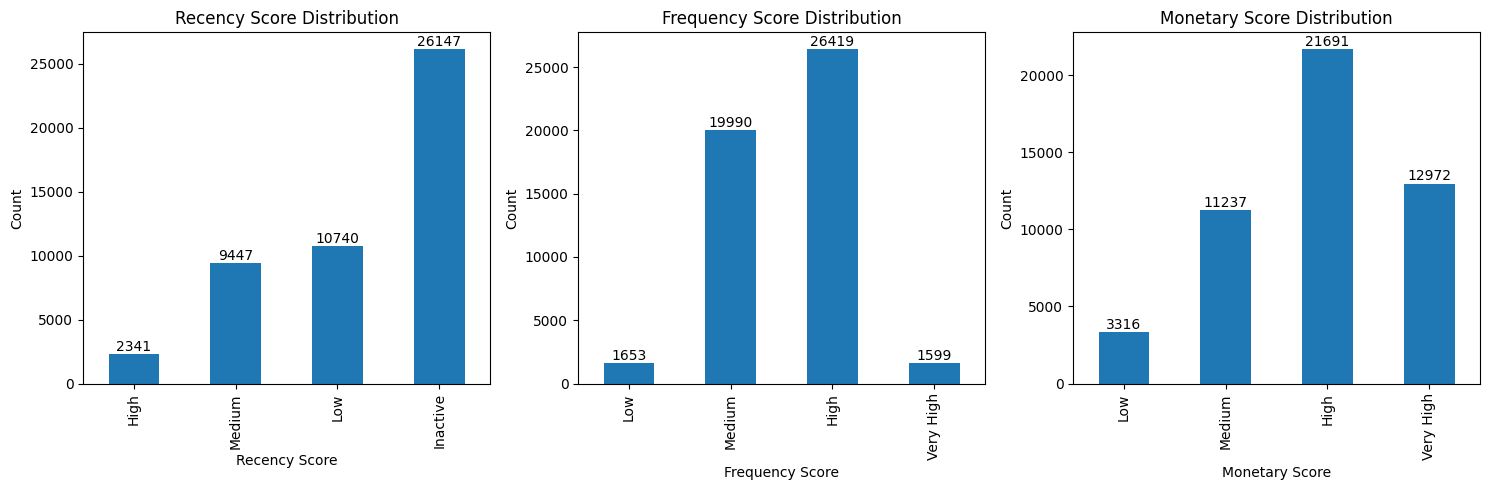

In [37]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Visualize the Recency Score distribution
recency_counts = rfm_df['Recency_Score'].value_counts().sort_index()
recency_counts.plot(kind='bar', ax=axes[0])
axes[0].set_title('Recency Score Distribution')
axes[0].set_xlabel('Recency Score')
axes[0].set_ylabel('Count')

for i, v in enumerate(recency_counts):
    axes[0].text(i, v + 10, str(v), ha='center', va='bottom')

# Visualize the Frequency Score distribution
frequency_counts = rfm_df['Frequency_Score'].value_counts().sort_index()
frequency_counts.plot(kind='bar', ax=axes[1])
axes[1].set_title('Frequency Score Distribution')
axes[1].set_xlabel('Frequency Score')
axes[1].set_ylabel('Count')

for i, v in enumerate(frequency_counts):
    axes[1].text(i, v + 10, str(v), ha='center', va='bottom')

# Visualize the Monetary Score distribution
monetary_counts = rfm_df['Monetary_Score'].value_counts().sort_index()
monetary_counts.plot(kind='bar', ax=axes[2])
axes[2].set_title('Monetary Score Distribution')
axes[2].set_xlabel('Monetary Score')
axes[2].set_ylabel('Count')

for i, v in enumerate(monetary_counts):
    axes[2].text(i, v + 10, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

Customer segmentation is crucial because it allows you to tailor your marketing strategies to different customer groups, just as authors adjust their narratives to resonate with specific reader preferences. Understanding customer behavior helps optimize revenue and improve your overall business strategy.


*Recency Analysis:*

We looked at how recently customers have interacted with our business. Some are recent, while others haven't been around for a while.

*Frequency Analysis:*

This part focused on how often our customers engage with us. We found that most fall into two categories: they either visit us quite a bit or they're loyal, frequent customers.

*Monetary Analysis:*

Here, we checked how much money each group of customers spends. We discovered a group that spends a lot, which is great for our revenue.

*So, what does this all mean?*

Our customers have different habits. Some are recent, others are loyal, and some spend a lot of money.
To make the most money and keep our customers happy, we have a plan:
We'll create special offers and marketing for those loyal customers who visit us often. They love us, so let's show them some love back.
For those who haven't been around for a while, we'll reach out with great deals to get them interested again. We want to win them back.
And of course, we'll keep those big spenders happy with excellent service and offers. They're important for our business.
This strategy considers all our customers, from the new ones to our biggest spenders, and it's all about making them happy and boosting our revenue.

## **Product Category Analysis:**

In our Product Category Analysis, we dove into the world of our products

**Product Category Distribution:**

We first looked at which product categories are popular. Our line chart shows us that some categories are more in demand than others. We even marked the count of products in each category on the lines for clarity.

In [38]:
# Calculate product category distribution
product_category_distribution = df['Product Category'].value_counts().reset_index()
product_category_distribution.columns = ['Product Category', 'Count']

# Sort the data by count in descending order
product_category_distribution = product_category_distribution.sort_values(by='Count', ascending=False)
product_category_distribution

,Product Category,Count
0,Electronics,62630
1,Clothing,62581
2,Home,62542
3,Books,62247


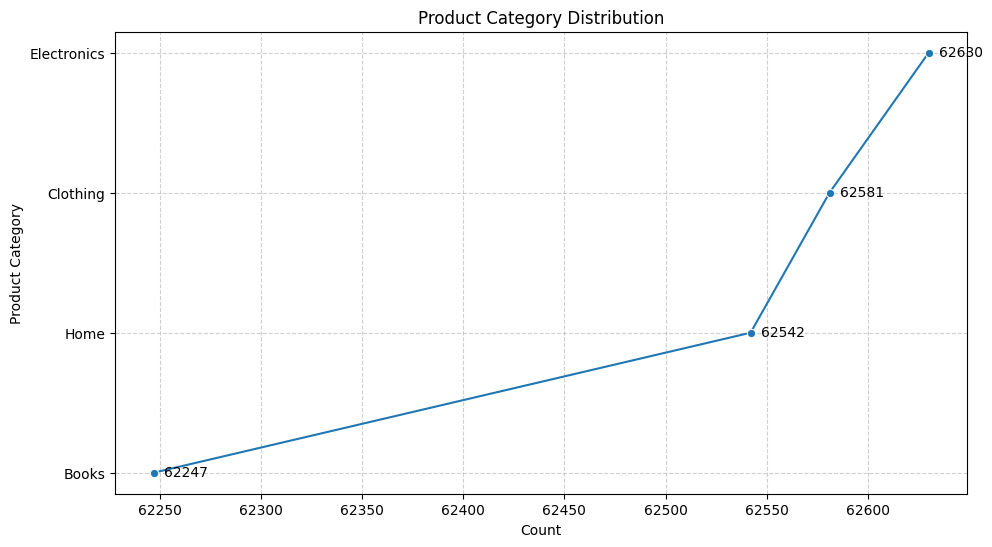

In [39]:
# Create a line chart with count points
plt.figure(figsize=(11, 6))
sns.lineplot(data=product_category_distribution, x='Count', y='Product Category', marker='o')
plt.title('Product Category Distribution')
plt.xlabel('Count')
plt.ylabel('Product Category')
plt.grid(True, linestyle='--', alpha=0.6)

# Add count annotations on the lines
for index, row in product_category_distribution.iterrows():
    plt.text(row['Count'] + 5, index, f'{row["Count"]}', va='center', fontsize=10)

plt.show()

**Total Sales by Product Category:**

Next, we determined which product categories bring in the most revenue. The barplot showcases the total purchase amounts, and we used a log scale to handle the wide range of sales. This allowed us to see the revenue distribution clearly.

In [40]:
# Calculate total sales by product category
product_category_sales = df.groupby('Product Category')['Total Purchase Amount'].sum().reset_index()
product_category_sales = product_category_sales.sort_values(by='Total Purchase Amount', ascending=False)
product_category_sales

,Product Category,Total Purchase Amount
3,Home,48130856
1,Clothing,47977746
2,Electronics,47801925
0,Books,47578138


C:\Users\pawar\AppData\Local\Temp\ipykernel_8428\4224494387.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=product_category_sales, x='Product Category', y='Total Purchase Amount', palette='viridis', errcolor=None, width=0.5)


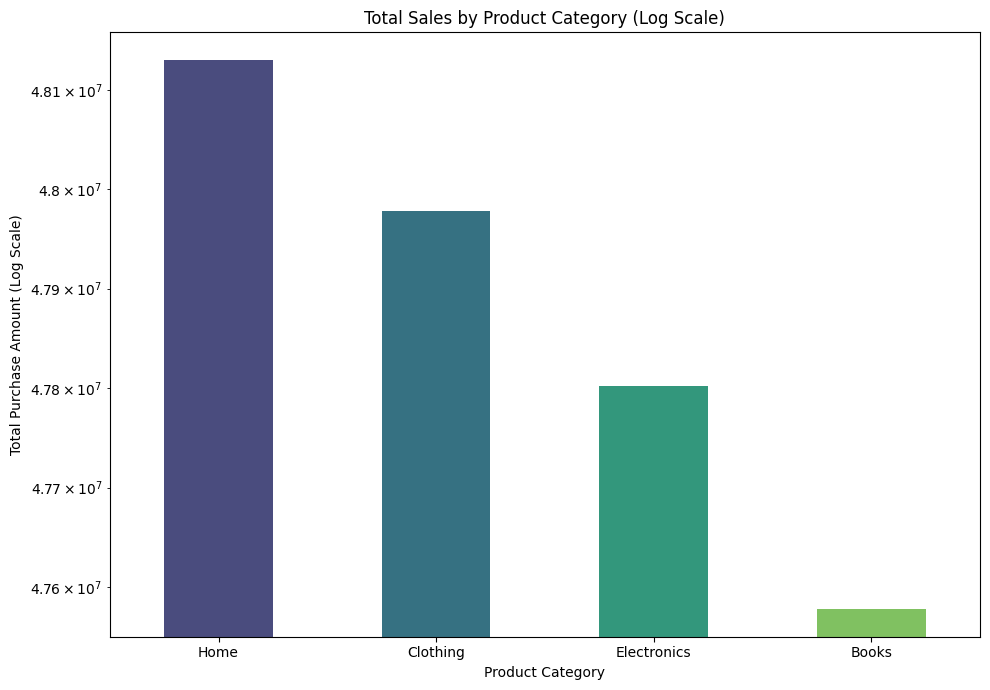

In [41]:
# Create a vertical barplot for total sales by product category with adjusted bar width and log scale on the y-axis
plt.figure(figsize=(10,7))
ax = sns.barplot(data=product_category_sales, x='Product Category', y='Total Purchase Amount', palette='viridis', errcolor=None, width=0.5)
plt.title('Total Sales by Product Category (Log Scale)')
plt.xlabel('Product Category')
plt.ylabel('Total Purchase Amount (Log Scale)')

# Set a log scale on the y-axis
ax.set_yscale('log')

plt.xticks()
plt.tight_layout()
plt.show()

**Product Category Revenue Distribution:**

To make it even more digestible, we created a pie chart. It visually represents the distribution of revenue across our product categories.

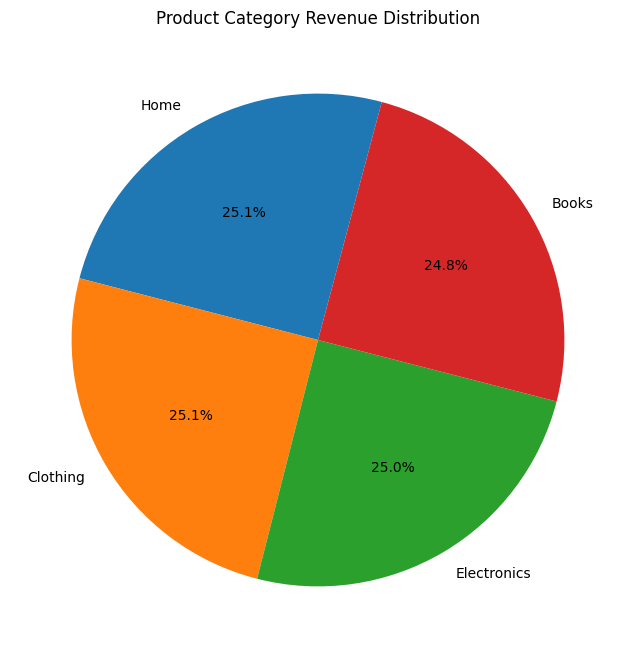

In [42]:
# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(product_category_sales['Total Purchase Amount'], labels=product_category_sales['Product Category'], autopct='%1.1f%%', startangle=75)

# Add a title
plt.title('Product Category Revenue Distribution')

# Display the chart
plt.show()

In essence, these analyses help us understand what our customers like, what's selling well, and which categories are most valuable in terms of revenue. Armed with this knowledge, we can make informed decisions about our product offerings and marketing strategies. It's all about maximizing our sales and keeping our customers happy with the products they love.


It's interesting to see the specific numbers for each product category:

*Product Category Distribution:*

*    Electronics: 62,630 products
*    Clothing: 62,581 products
*    Home: 62,542 products
*    Books: 62,247 products

*Total Sales by Product Category:*

   * Electronics: 48,130,856 Dollars
   * Clothing: 47,977,746 Dollars
   * Home: 47,801,925 Dollars
   * Books: 47,578,138 Dollars


From these figures, it's clear that "Home" products are not only the most numerous but also the top revenue contributor. "Clothing" and "Electronics" closely follow, with similar revenue figures. "Books" also perform well, but they have slightly lower sales compared to the other categories.

This detailed breakdown helps us understand the product landscape, allowing us to focus our marketing and inventory efforts effectively. It's not just about what's popular; it's about what's profitable too.

## **Returns Analysis:**

In this phase, we're diving into understanding the dynamics of returns and how they impact our business. Here's what we're exploring:

**Return Rate:**

The return rate indicates the percentage of items returned out of total purchases.
Our return rate stands at 40.59%, implying that about 40.59% of purchases are returned. This is a crucial metric as it directly affects our revenue and customer satisfaction.

In [43]:
# Calculate return rate
return_rate = df['Returns'].mean()
print(f'Return Rate: {return_rate:.2%}')

Return Rate: 40.59%


**Lost Revenue due to Returns:**

Returns have a financial impact. We've calculated that the total lost revenue due to returns is 78,161,640 dollars. This amount could have been retained if returns were reduced.

In [44]:
# Calculate total lost revenue due to returns
total_lost_revenue = df[df['Returns'] == 1]['Total Purchase Amount'].sum()
print(f'Total Lost Revenue due to Returns: ${total_lost_revenue:.2f}')

Total Lost Revenue due to Returns: $78161640.00


**Return Rates by Product Category:**

We've analyzed return rates for different product categories to identify which categories are more prone to returns.
All product categories have similar return rates, with Books having the highest return rate at 40.81%, and Electronics the lowest at 40.63%. This suggests that return rates are evenly distributed across product categories.

In [45]:
# Step 1: Group data by return status
returned_data = df[df['Returns'] == 1]
not_returned_data = df[df['Returns'] == 0]

# Step 2: Analyze return rates by product category
return_rate_by_category = returned_data['Product Category'].value_counts() / df['Product Category'].value_counts()
return_rate_by_category

Product Category
Books          0.408148
Clothing       0.404308
Electronics    0.406323
Home           0.404848
Name: count, dtype: float64

**Return Rates by Customer Segments:**

Different customer segments may have varying return rates.
Our analysis shows that the return rates are relatively consistent across customer segments, with High-Value customers having the highest return rate at 40.92%, and Low-Value customers the lowest at 40.36%.

In [46]:
# Step 3: Analyze return rates by customer groups
return_rate_by_customer_group = returned_data['Customer Segment'].value_counts() / df['Customer Segment'].value_counts()
return_rate_by_customer_group

Customer Segment
Low-Value     0.403708
Mid-Value     0.406930
High-Value    0.412567
Name: count, dtype: float64

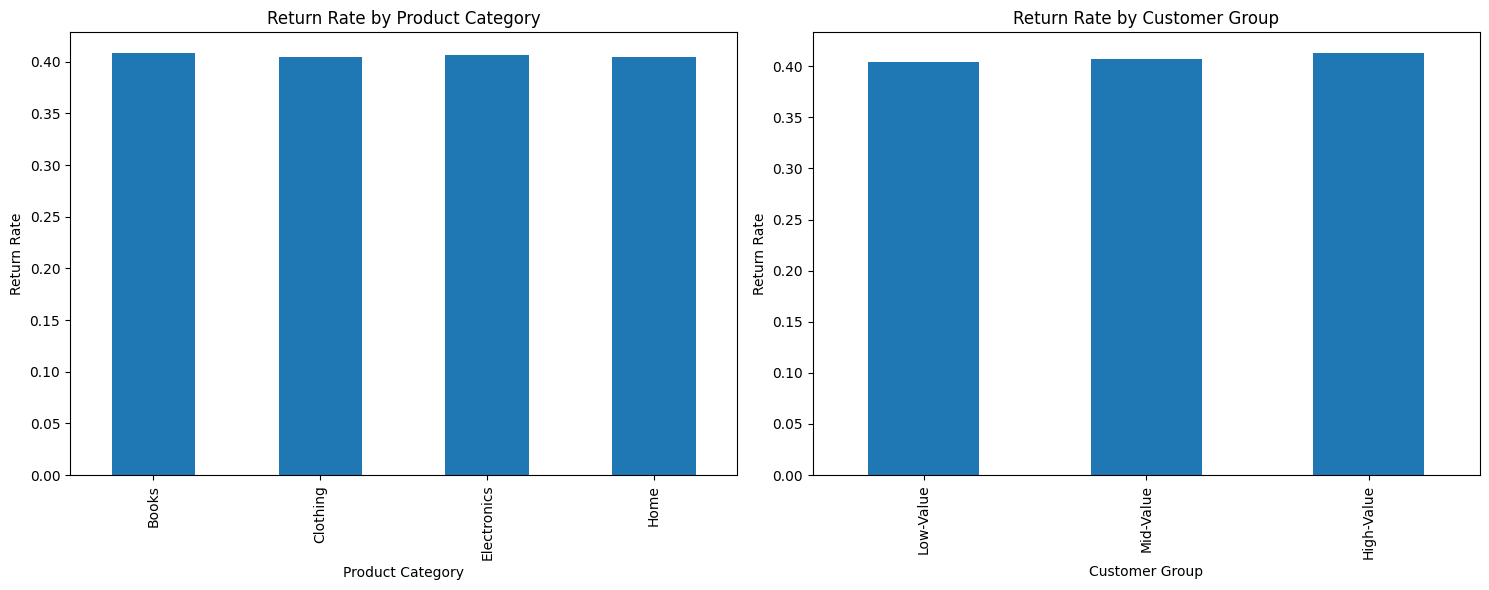

In [48]:
# Set the figure size
plt.figure(figsize=(15, 6))

# Plot return rates by product category
plt.subplot(1, 2, 1)
return_rate_by_category.plot(kind='bar')
plt.title('Return Rate by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Return Rate')

# Plot return rates by customer group
plt.subplot(1, 2, 2)
return_rate_by_customer_group.plot(kind='bar')
plt.title('Return Rate by Customer Group')
plt.xlabel('Customer Group')
plt.ylabel('Return Rate')

# Show the plots
plt.tight_layout()
plt.show()

To reduce returns and enhance customer satisfaction, we need to delve deeper into the reasons behind returns. It's an essential step to develop effective strategies. Reducing the return rate not only retains revenue but also improves the overall shopping experience.

In [71]:
# Create a contingency table for return status and Customer Segment
contingency_table1 = pd.crosstab(df['Returns'], df['Customer Segment'])

# Perform the Chi-squared test for independence
chi2, p, _, _ = stats.chi2_contingency(contingency_table1)
print(f'Chi-squared value: {chi2}')
print(f'p-value: {p}')

# If p-value is less than your chosen significance level (e.g., 0.05), you can reject the null hypothesis
if p < 0.05:
    print("Returns and Customer Segment are related.")
else:
    print("Returns and Customer Segment are not significantly related.")

Chi-squared value: 9.228761384071374
p-value: 0.009908317807360848
Returns and Customer Segment are related.


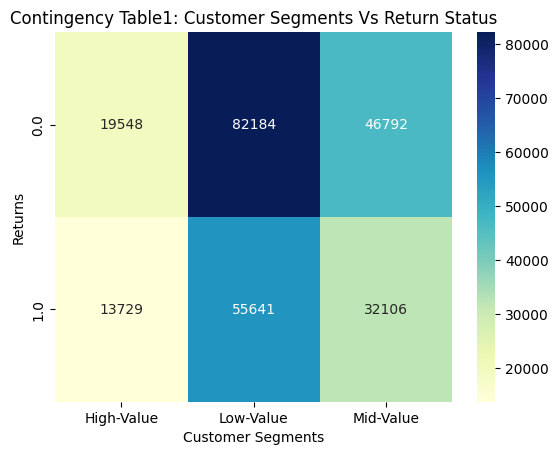

In [73]:
# Create a bar plot
sns.heatmap(contingency_table1, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Contingency Table1: Customer Segments Vs Return Status')
plt.xlabel('Customer Segments')
plt.ylabel('Returns')
plt.show()

In [ ]:
# Transpose the contingency table
contingency_table1 = contingency_table1.T

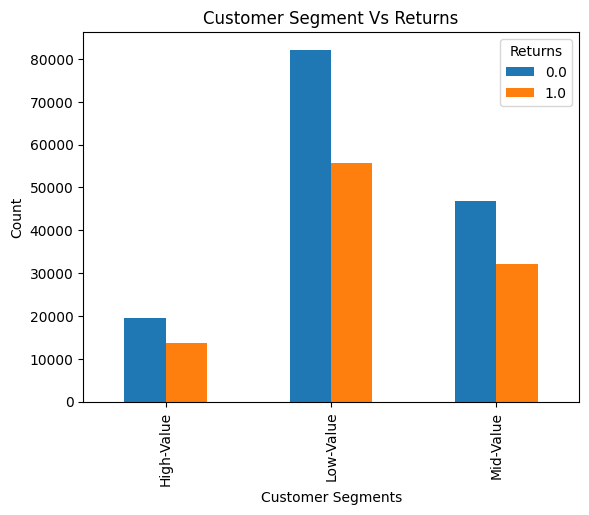

In [ ]:
# Create a bar plot with 'Customer Segment' on the x-axis
contingency_table1.plot(kind='bar', stacked=False)

# Customize the plot
plt.title('Customer Segment Vs Returns')
plt.xlabel('Customer Segments')
plt.ylabel('Count')

# Display the legend
plt.legend(title='Returns')

# Show the plot
plt.show()

When we look at the data, we can see a connection between the type of customer and the likelihood of returning products. Let me break it down for you:

High-Value Customers:

These are the customers who spend more on our products.
Out of all the high-value customers, only 13,729 of them have returned products.
The majority, 19,548 of them, didn't return anything.
This suggests that high-value customers tend to keep the products they buy and are less likely to return them.

Low-Value Customers:

Low-value customers, who typically spend less, show a different pattern.
A substantial 55,641 of them have returned products.
However, a significant 82,184 of them haven't returned anything.
It appears that low-value customers are more inclined to return products, compared to high-value customers.

Mid-Value Customers:

These customers fall in between high-value and low-value customers.
They have 32,106 returns and 46,792 non-returns.
So, they have a moderate likelihood of returning products.
In simpler terms, high-value customers are quite content with their purchases and return products less frequently. On the other hand, low-value customers return products more often. Mid-value customers are in the middle, with a balanced approach.

This information can be valuable for our business to better understand our customers and tailor our strategies, marketing efforts, and return policies accordingly. It's important to recognize these customer behaviors to improve customer satisfaction and, in turn, the success of our business.

## **Churn Analysis:**

In this part of our project, we're addressing the critical issue of customer churn, where customers cease purchasing from our platform. We're diving into this analysis with the following objectives:

**Churn Rate:**

We start by calculating the churn rate, which indicates the percentage of customers who have stopped purchasing.
Currently, our churn rate stands at 20.05%, implying that about 20.05% of our customers have churned. This metric is vital in assessing our customer retention efforts.

In [49]:
# Calculate churn rate
churn_rate = (df['Churn'].sum() / len(df['Churn'])) * 100
print(f'Churn Rate: {churn_rate:.2f}%')

Churn Rate: 20.05%


**Understanding Churned Customers:**

We identify churned customers by filtering those with a 'Churn' status of 1.
To analyze factors leading to churn, we look at the characteristics of churned customers, such as their total purchase amount, age, gender, and preferred product categories.

**Customer Age Distribution:**

We examine the distribution of churned customers across different age groups.
Our analysis shows the count of churned customers in each age group. This can help us understand if certain age groups are more prone to churn.

**Gender Distribution:**

Gender can be a factor in churn. We analyze the distribution of churned customers by gender.
This analysis provides insights into whether there are gender-related trends in customer churn.

**Product Category Analysis:**

We also look at which product categories are more commonly associated with churned customers.
Understanding the product preferences of churned customers can guide us in refining our product offerings and marketing strategies.

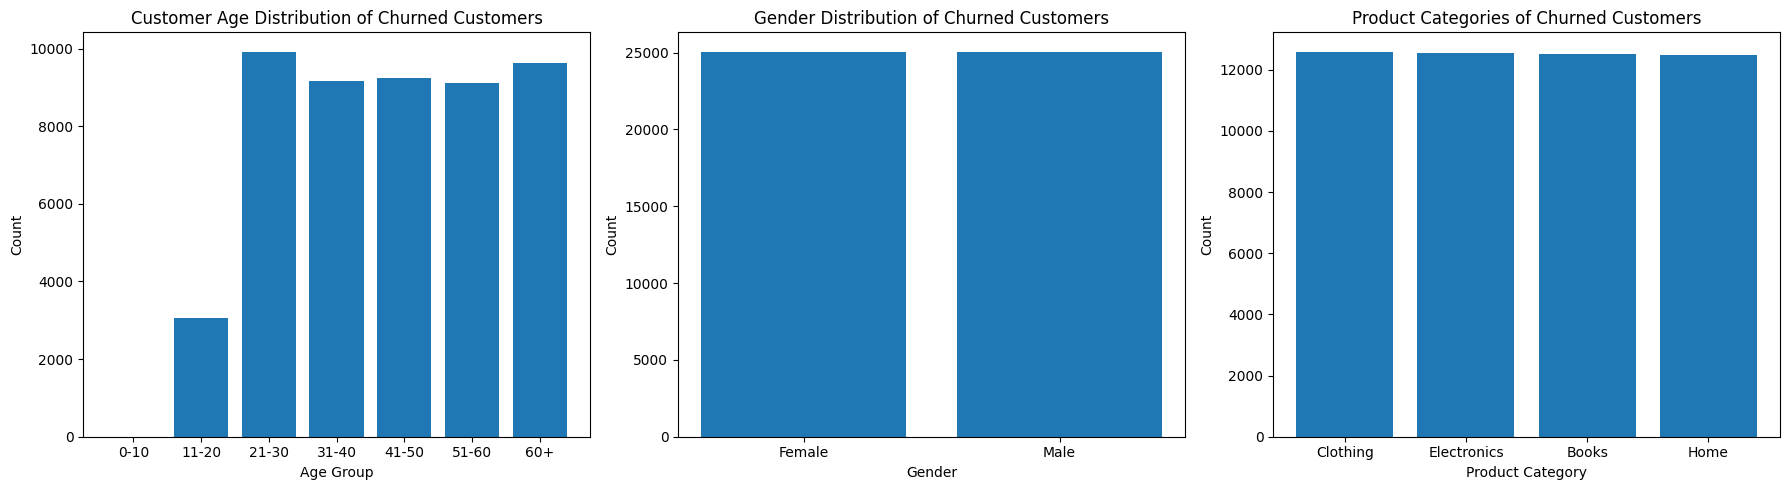

In [50]:
# Filter churned customers (assuming 'Churn' column with values 0 for retained, 1 for churned)
churned_customers = df[df['Churn'] == 1]

# Analyze common characteristics of churned customers
churned_customer_info = churned_customers[['Customer ID', 'Total Purchase Amount', 'Product Category', 'Customer Age', 'Gender']]

# Create a figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot Customer Age Distribution with age bins
churned_age_bins = pd.cut(churned_customer_info['Customer Age'], bins=age_ranges, labels=age_labels)
age_counts = churned_age_bins.value_counts().reindex(age_labels, fill_value=0)
axes[0].bar(age_counts.index, age_counts.values)
axes[0].set_title('Customer Age Distribution of Churned Customers')
axes[0].set_xlabel('Age Group')
axes[0].set_ylabel('Count')

# Plot Gender Distribution
churned_gender_counts = churned_customer_info['Gender'].value_counts()
axes[1].bar(churned_gender_counts.index, churned_gender_counts.values)
axes[1].set_title('Gender Distribution of Churned Customers')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Count')

# Plot Product Category Distribution
churned_product_category_counts = churned_customer_info['Product Category'].value_counts()
axes[2].bar(churned_product_category_counts.index, churned_product_category_counts.values)
axes[2].set_title('Product Categories of Churned Customers')
axes[2].set_xlabel('Product Category')
axes[2].set_ylabel('Count')

plt.tight_layout()
plt.show()

To reduce churn and retain customers, it's essential to develop strategies tailored to the specific characteristics of churned customers.

## **Customer Lifetime Value (CLV):**

Now, let's delve into the intriguing realm of Customer Lifetime Value, or CLV, which helps us understand the long-term value of our customers. Our CLV analysis revolves around these primary objectives:

**CLV Calculation:**

We start by calculating CLV, a vital metric for any business. It quantifies the total revenue a customer is expected to generate throughout their relationship with us.
To illustrate, we consider the average purchase value and the retention rate. As of now, the calculated CLV stands at $3,819.84. This figure represents the expected value each customer brings over their lifetime with our platform.

In [51]:
# Calculate CLV (with retention rate and average purchase value)
average_purchase_value = df['Total Purchase Amount'].mean()
retention_rate = 1 - (churn_rate / 100)
clv = average_purchase_value / (1 - retention_rate)
print(f'Customer Lifetime Value (CLV): ${clv:.2f}')

Customer Lifetime Value (CLV): $3819.84


**Segmenting Customers for CLV Analysis:**

To gain a more comprehensive understanding, you segmented customers based on their behavior and characteristics. You then calculated CLV for each segment, allowing you to identify the most valuable ones.

Here are the CLV values for different customer segments:

* High-Value Segment: CLV: 9,504.56
* Low-Value Segment: CLV: 1,622.98
* Mid-Value Segment: CLV: 5,259.84

In [52]:
# Calculate average purchase value for each segment
average_purchase_value_by_segment = df.groupby('Customer Segment')['Total Purchase Amount'].mean()

# Calculate retention rate for the entire dataset
retention_rate = 1 - (churn_rate / 100)  # Assuming you have a churn rate value

# Calculate CLV for each segment
clv_by_segment = {}
for segment, avg_purchase_value in average_purchase_value_by_segment.items():
    clv = avg_purchase_value / (1 - retention_rate)
    clv_by_segment[segment] = clv

# Identify high-value segments
high_value_segments = [segment for segment, clv in clv_by_segment.items() if clv >= 1000]

# Print CLV by segment
print("CLV by Segment:")
for segment, clv in clv_by_segment.items():
    print(f"{segment}: ${clv:.2f}")

CLV by Segment:
High-Value: $9504.56
Low-Value: $1622.98
Mid-Value: $5259.84


**High-Value Segments:**

You identified that all segments, including High-Value, Low-Value, and Mid-Value, have CLV values above $1,000, indicating that these segments contribute significantly to the long-term revenue. This insight is crucial for tailoring marketing strategies and retention efforts towards these high-value segments to maximize revenue and customer satisfaction.

In [53]:
# Print high-value segments
print("High-Value Segments:")
print(high_value_segments)

High-Value Segments:
['High-Value', 'Low-Value', 'Mid-Value']


In essence, by calculating CLV and segmenting customers, you've gained valuable insights that can guide your business strategy for revenue optimization and customer relationship management.

## **Payment Method Analysis:**

This analysis focuses on understanding payment method preferences among customers, identifying trends in payment method usage, and evaluating the impact of payment methods on revenue.

**Payment Method Preferences:**

So, first things first, we looked into how our customers prefer to pay for their purchases. It turns out we have quite an even split:

* Credit Card was the choice for 83,547 customers.
* PayPal was really close behind with 83,441 users.
* Good old Cash was used by 83,012 people.

In [54]:
# Analyze payment methods
payment_method_counts = df['Payment Method'].value_counts()
print(payment_method_counts)

Payment Method
Credit Card    83547
PayPal         83441
Cash           83012
Name: count, dtype: int64


**Independence Test:**

Next, we wondered if the way people pay affects whether they return products. To find out, we ran a Chi-squared test. Now, here's the interesting part – the results suggest that the payment method and returns are not significantly related. In other words, the way folks pay doesn't seem to impact whether they send stuff back.

**Average Purchase Value:**

But it doesn't stop there. We also checked if the choice of payment method affects how much people spend. The average purchase values are pretty close:

* Cash: 764.08
* Credit Card: 764.85
* PayPal: 768.92
In simple terms, it seems like the payment method people pick doesn't hugely influence how much they spend on our platform.

In [55]:
import scipy.stats as stats

# Create a contingency table for payment method and return status
contingency_table = pd.crosstab(df['Payment Method'], df['Returns'])

# Perform the Chi-squared test for independence
chi2, p, _, _ = stats.chi2_contingency(contingency_table)
print(f'Chi-squared value: {chi2}')
print(f'p-value: {p}')

# If p-value is less than your chosen significance level (e.g., 0.05), you can reject the null hypothesis
if p < 0.05:
    print("Payment method and return status are related.")
else:
    print("Payment method and return status are not significantly related.")

# Compare the means of average purchase values for each payment method
average_purchase_by_payment = df.groupby('Payment Method')['Total Purchase Amount'].mean()
print(average_purchase_by_payment)

Chi-squared value: 0.34605415277643103
p-value: 0.8411148401843502
Payment method and return status are not significantly related.
Payment Method
Cash           764.078952
Credit Card    764.853974
PayPal         768.922808
Name: Total Purchase Amount, dtype: float64


**Visual Representation:**

To make this all easier to grasp, we created some visuals. We have a heatmap that shows the connection between payment methods and returns. It's like a color-coded map that helps us see there's no strong link. All in all, it's pretty clear that payment method choice doesn't drastically impact the numbers.

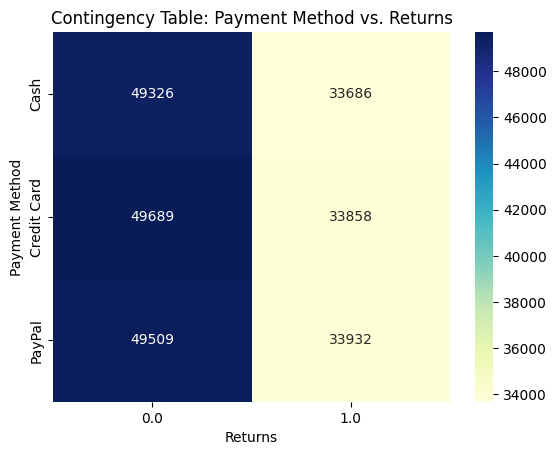

In [56]:
# Create a bar plot
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Contingency Table: Payment Method vs. Returns')
plt.xlabel('Returns')
plt.ylabel('Payment Method')
plt.show()

**Key Insights from our Analysis**

* RFM Analysis: 
    Our customer base is diverse, with a mix of recent and loyal customers. Notably, 'Very High' Monetary customers are driving significant revenue, offering a growth opportunity.

* Customer Segmentation: 
    Segmenting customers into 'High-Value,' 'Mid-Value,' and 'Low-Value' groups revealed that 'High-Value' customers have the highest Customer Lifetime Value (CLV), making them a top priority for retention and engagement efforts.

* Return Behavior by Customer Segment: 
    When examining the likelihood of returning products, an interesting pattern emerges among different customer segments. 'High-Value' customers exhibit the lowest return rates, indicating a tendency to retain their purchases. On the other hand, 'Low-Value' customers are more likely to return products. Understanding these variations in return behavior can guide product strategies and marketing efforts to meet the distinct needs of each customer group.

* Churn Analysis: 
    The churn rate is 20.05%, emphasizing the importance of developing strategies to retain customers. Insights such as customer age and gender among churned customers can inform these strategies.

* Payment Method Analysis: 
    Surprisingly, the choice of payment method does not significantly impact return behavior or spending.

These insights provide a clear path for tailoring marketing and retention strategies for different customer segments, with a specific focus on retaining 'High-Value' customers for sustained growth and customer satisfaction.